### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [9]:
data = pd.read_csv('data/coupons.csv')

In [10]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


Examine the shape and structure of the data

In [13]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")
print("\nColumn names and data types:")
print(data.dtypes)

categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

Number of rows: 12684
Number of columns: 26

Column names and data types:
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

Categorical columns: ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'a

2. Investigate the dataset for missing or problematic data.

In [18]:
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [20]:
print("List of columns with missing data:")
nan_columns = [col for col in data.columns if data[col].isnull().sum()]

for nan_item in nan_columns:
    print(nan_item)

List of columns with missing data:
car
Bar
CoffeeHouse
CarryAway
RestaurantLessThan20
Restaurant20To50


In [22]:
print("\nAnalysis of columns with missing data:")
for col in nan_columns:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())
    print(f"Unique values: {data[col].nunique()}")
    print(f"Most frequent: {data[col].mode()[0]}")


Analysis of columns with missing data:

Column: car
car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64
Unique values: 5
Most frequent: Mazda5

Column: Bar
Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
Unique values: 5
Most frequent: never

Column: CoffeeHouse
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64
Unique values: 5
Most frequent: less1

Column: CarryAway
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64
Unique values: 5
Most frequent: 1~3

Column: RestaurantLessThan20
RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64
Unique values: 5


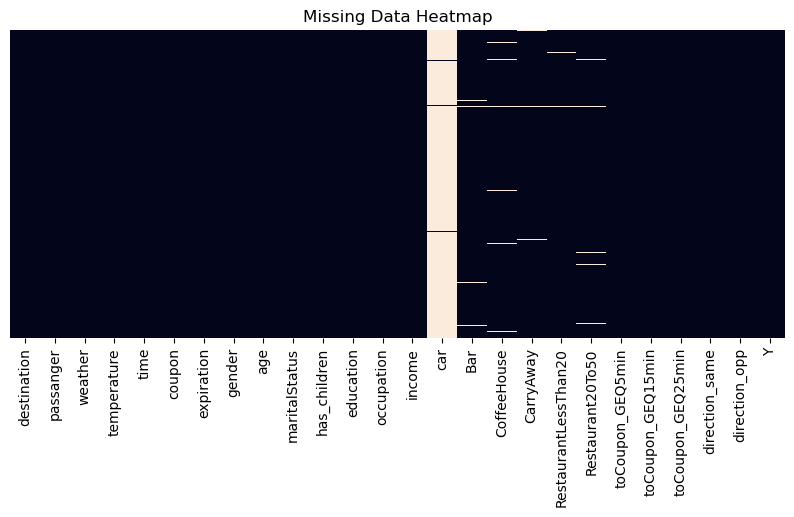

In [24]:
# Plot a heatmap to visualize the missing data
plt.figure(figsize=(10, 4))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [26]:
# With the exception of the 'car' column, the dataset is fairly complete. 
print("Remove mostly unavailable categorical feature 'car'")
data.drop(columns='car')

Remove mostly unavailable categorical feature 'car'


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [30]:
# Calculate proportion of coupons accepted
count_accepted_coupon = data.query('Y == 1').shape[0]
proportion_accepted = count_accepted_coupon / data.shape[0]

print(f"Of the total observations, a proportion of {proportion_accepted:.4f} accepted the coupon.")

Of the total observations, a proportion of 0.5684 accepted the coupon.


5. Use a bar plot to visualize the `coupon` column.


Column: coupon
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64
Unique values: 5
Most frequent: Coffee House


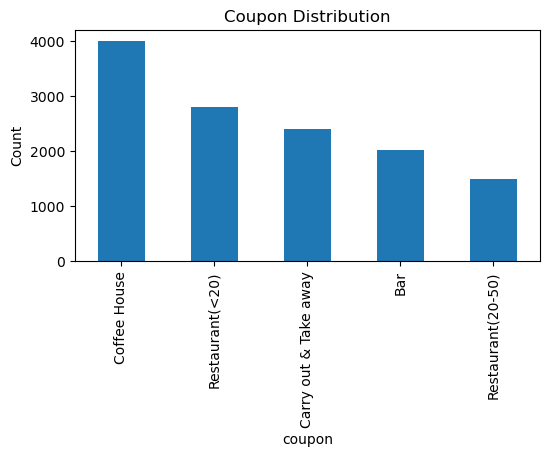

In [33]:
print(f"\nColumn: coupon")
print(data['coupon'].value_counts())
print(f"Unique values: {data.coupon.nunique()}")
print(f"Most frequent: {data.coupon.mode()[0]}")

plt.figure(figsize=(6, 3))
data["coupon"].value_counts().plot(kind='bar')
plt.title('Coupon Distribution')
plt.ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.

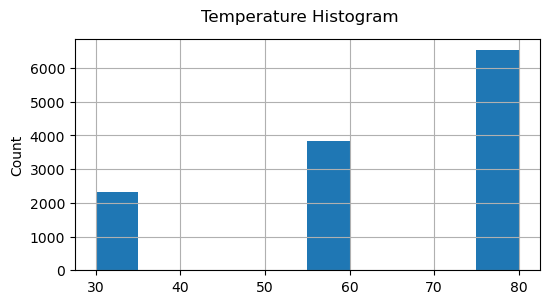

In [36]:
data['temperature'].hist(figsize=(6, 3), bins=10)
plt.suptitle('Temperature Histogram')
plt.ylabel('Count')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [39]:
bar_coupons = data[['Bar']]
print(bar_coupons.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Bar     12577 non-null  object
dtypes: object(1)
memory usage: 99.2+ KB
None


2. What proportion of bar coupons were accepted?


In [42]:
# Calculate proportion of bar coupons accepted
total_bar_coupons = bar_coupons.shape[0]
accepted_bar = bar_coupons.join(data['Y'], how="outer").query('Y == 1')
total_accepted_bar = accepted_bar.shape[0]

proportion_accepted_bar = total_accepted_bar / total_bar_coupons

print(f"Of the total {total_accepted_bar} bar coupons, a proportion of {proportion_accepted_bar:.4f} were accepted.")

Of the total 7210 bar coupons, a proportion of 0.5684 were accepted.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [45]:
# Group and filter drivers characterized by bar visit frequency  
accepted_bar = bar_coupons.join(data['Y'], how="outer").query('Y == 1')
total_accepted_bar = accepted_bar.shape[0]

visit_3_or_less = accepted_bar.groupby('Bar').filter(lambda x: x['Bar'].iloc[0] in ['never', 'less1', '1~3'])
visit_4_or_more = accepted_bar.groupby('Bar').filter(lambda x: x['Bar'].iloc[0] in ['4~8','gt8'])

rate_3_or_less = visit_3_or_less.shape[0] / total_accepted_bar
rate_4_or_more = visit_4_or_more.shape[0] / total_accepted_bar

print("Comparing Proportional Acceptance:")
print(f"A proportion of {rate_3_or_less:.4f} were accepted by drivers that visit 3 or less times.")
print(f"A proportion of {rate_4_or_more:.4f} were accepted by drivers that visit 4 or more times.")

print(f"\nAccepted Coupons: {visit_3_or_less.shape[0]}")
print(" (drivers visiting 3 or less)")
print(f"\nOther Accepted: {visit_4_or_more.shape[0]}")
print(" (drivers visiting 4 or more)")
print(f"\nTotal Coupons Accepted in Category: {total_accepted_bar}\n")

print("Interpretation of Results")
print(f"With a percentage of {rate_3_or_less * 100:.2f}%, \
we observe that drivers that visited bars 3 or less times were significantly more likely to accept Bar coupons.") 

Comparing Proportional Acceptance:
A proportion of 0.8693 were accepted by drivers that visit 3 or less times.
A proportion of 0.1230 were accepted by drivers that visit 4 or more times.

Accepted Coupons: 6268
 (drivers visiting 3 or less)

Other Accepted: 887
 (drivers visiting 4 or more)

Total Coupons Accepted in Category: 7210

Interpretation of Results
With a percentage of 86.93%, we observe that drivers that visited bars 3 or less times were significantly more likely to accept Bar coupons.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [48]:
# Determine a dataframe with accepted coupons characterized by both age and column
accepted_bar_age = bar_coupons.join(data[['Y', 'age']], how="outer").query('Y == 1')
total_accepted_bar_age = accepted_bar_age.shape[0]

categories_to_check = ['below21', '21', 'less1', 'never']

visit_less_once_and_25_under = accepted_bar_age\
                                .groupby(['Bar', 'age'])\
                                .filter(lambda x: (x['Bar'].iloc[0] in categories_to_check) or\
                                                  (x['age'].iloc[0] in categories_to_check))

count_less_once_and_25_under = visit_less_once_and_25_under.shape[0]

# Subtract the subset DataFrame from the original DataFrame
visit_once_more_and_over_25 = accepted_bar_age[~accepted_bar_age.isin(visit_less_once_and_25_under).all(axis=1)]
count_once_more_and_over_25 = visit_once_more_and_over_25.shape[0]

print("Comparing Proportional Acceptance:")
print(f"A proportion of {count_once_more_and_over_25 / total_accepted_bar_age:.4f} were accepted \
by drivers who go to a bar more than once a month and are over the age of 25.")
print(f"A proportion of {count_less_once_and_25_under / total_accepted_bar_age:.4f} were accepted by all others.")

print(f"\nAccepted Coupons: {count_once_more_and_over_25}")
print(" (more than once, over 25)")
print(f"\nOther Accepted: {count_less_once_and_25_under}")
print(" (other, less, 25 and under)")
print(f"\nTotal Coupons Accepted in Category: {total_accepted_bar_age}\n")

print("Interpretation of Results")
print(f"With a percentage of {count_once_more_and_over_25 / total_accepted_bar_age * 100:.2f}%, we observe that drivers \
who go to a bar more than once a month and are over the age of 25 were significantly more likely to accept Bar coupons to all others.") 

Comparing Proportional Acceptance:
A proportion of 0.2470 were accepted by drivers who go to a bar more than once a month and are over the age of 25.
A proportion of 0.7530 were accepted by all others.

Accepted Coupons: 1781
 (more than once, over 25)

Other Accepted: 5429
 (other, less, 25 and under)

Total Coupons Accepted in Category: 7210

Interpretation of Results
With a percentage of 24.70%, we observe that drivers who go to a bar more than once a month and are over the age of 25 were significantly more likely to accept Bar coupons to all others.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [54]:
# Taking passangers and occupation into account
accepted_bar_work_pass = bar_coupons.join(data[['Y', 'occupation', 'passanger']], how="outer").query('Y == 1')
accepted_bar_work_pass.rename(columns={'passanger': 'passenger'}, inplace=True)
total_bar_no_kids = accepted_bar_work_pass.shape[0]

# Ensure driver not in following categories
bar_not_less_than_once = ['less1', 'never']
passengers_check_against = ['Kid(s)']
occupations_check_against = ['Farming Fishing & Forestry']
categories_check_against = bar_not_less_than_once + passengers_check_against + occupations_check_against

visit_bar_once_more_no_kids_not_farmer = accepted_bar_work_pass\
                                          .groupby(['Bar', 'occupation', 'passenger'])\
                                          .filter(lambda x: (x['Bar'].iloc[0] not in categories_check_against) and\
                                                            (x['occupation'].iloc[0] not in categories_check_against) and\
                                                            (x['passenger'].iloc[0] not in categories_check_against))

count_bar_once_more_no_kids_not_farmer = visit_bar_once_more_no_kids_not_farmer.shape[0]

# Subtract the subset DataFrame from the original DataFrame
visit_more_kids_ok_open_to_farm = accepted_bar_work_pass[~accepted_bar_work_pass.isin(visit_bar_once_more_no_kids_not_farmer).all(axis=1)]
count_more_kids_ok_open_to_farm = visit_more_kids_ok_open_to_farm.shape[0]

print("Comparing Proportional Acceptance:")
print(f"A proportion of {count_bar_once_more_no_kids_not_farmer / total_bar_no_kids:.4f} were accepted \
by drivers who go to a bar more than once a month and are over the age of 25.")
print(f"A proportion of {count_more_kids_ok_open_to_farm / total_bar_no_kids:.4f} were accepted by all others.")

print(f"\nAccepted Coupons: {count_bar_once_more_no_kids_not_farmer}")
print(" (more than once, no kids, non farmer)")
print(f"\nOther Accepted: {count_more_kids_ok_open_to_farm}")
print(" (other, less, kids ok, farmer ok)")
print(f"\nTotal Coupons Accepted in Category: {total_bar_no_kids}\n")

print("Interpretation of Results")
print(f"The statistics indicate that folks in the 'Farming Fishing & Forestery' that infrequently visit bars and have kids, as passengers, are strongly open to accepting a Bar coupon.")


Comparing Proportional Acceptance:
A proportion of 0.3194 were accepted by drivers who go to a bar more than once a month and are over the age of 25.
A proportion of 0.6806 were accepted by all others.

Accepted Coupons: 2303
 (more than once, no kids, non farmer)

Other Accepted: 4907
 (other, less, kids ok, farmer ok)

Total Coupons Accepted in Category: 7210

Interpretation of Results
The statistics indicate that folks in the 'Farming Fishing & Forestery' that infrequently visit bars and have kids, as passengers, are strongly open to accepting a Bar coupon.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [57]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
accepted_bar_pass_non_widow = bar_coupons.join(data[['Y', 'maritalStatus', 'passanger']], how="outer").query('Y == 1')
accepted_bar_pass_non_widow.rename(columns={'passanger': 'passenger'}, inplace=True)
total_bar_pass_non_widow = accepted_bar_pass_non_widow.shape[0]

# Ensure driver not in following categories
bar_not_less_than_once = ['less1', 'never']
passengers_check_against = ['Kid(s)', 'Alone']
marital_check_against = ['Widowed']
categories_check_against = bar_not_less_than_once + passengers_check_against + marital_check_against

bar_less_kids_alone_and_widowed = accepted_bar_pass_non_widow\
                                          .groupby(['Bar', 'maritalStatus', 'passenger'])\
                                          .filter(lambda x: (x['Bar'].iloc[0] not in categories_check_against) and\
                                                            (x['maritalStatus'].iloc[0] not in categories_check_against) and\
                                                            (x['passenger'].iloc[0] not in categories_check_against))

# Subtract the inverse subset to arrive at desired DataFrame 
visit_more_no_kids_non_widow = accepted_bar_pass_non_widow[~accepted_bar_pass_non_widow.isin(bar_less_kids_alone_and_widowed).all(axis=1)]
count_more_no_kids_non_widow = visit_more_no_kids_non_widow.shape[0]

print(f"A proportion of {count_more_no_kids_non_widow / total_bar_pass_non_widow:.4f} were accepted \
by drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed.")

print(f"\nAccepted Coupons: {count_more_no_kids_non_widow}")
print(" (more than once, no kids, not widowed)")
print(f"\nTotal Coupons Accepted in Category: {total_bar_pass_non_widow}")

A proportion of 0.8646 were accepted by drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed.

Accepted Coupons: 6234
 (more than once, no kids, not widowed)

Total Coupons Accepted in Category: 7210


In [59]:
# go to bars more than once a month and are under the age of 30
accepted_bar_more_once_under_30 = bar_coupons.join(data[['Y', 'age']], how="outer").query('Y == 1')
total_bar_more_once_under_30 = accepted_bar_more_once_under_30.shape[0]

# Ensure driver not in following categories
categories_check_against = ['below21', '21', '26', 'less1', 'never']

visit_less_once_and_30_over = accepted_bar_more_once_under_30\
                                .groupby(['Bar', 'age'])\
                                .filter(lambda x: (x['Bar'].iloc[0] not in categories_check_against) and\
                                                  (x['age'].iloc[0] not in categories_check_against))

# Subtract the subset DataFrame from the original DataFrame
visit_once_more_and_under_30 = accepted_bar_more_once_under_30[~accepted_bar_more_once_under_30.isin(visit_less_once_and_30_over).all(axis=1)]
count_once_more_and_under_30 = visit_once_more_and_under_30.shape[0]

print(f"A proportion of {count_once_more_and_under_30 / total_bar_more_once_under_30:.4f} were accepted \
by drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed.")

print(f"\nAccepted Coupons: {count_once_more_and_under_30}")
print(" (more than once, under age 30)")
print(f"\nTotal Coupons Accepted in Category: {total_bar_more_once_under_30}")

A proportion of 0.8616 were accepted by drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed.

Accepted Coupons: 6212
 (more than once, under age 30)

Total Coupons Accepted in Category: 7210


In [61]:
# Go to cheap restaurants more than 4 times a month and income is less than 50K.
# Note: presuming "RestaurantLessThan20" to be "cheap"
accepted_bar_cheap_patron_less_50 = bar_coupons.join(data[['Y', 'RestaurantLessThan20', 'income']], how="outer").query('Y == 1')
total_bar_cheap_patron_less_50 = accepted_bar_cheap_patron_less_50.shape[0]

# Ensure driver in following categories
cheap_visits = ["4~8", "gt8"]
make_less_50 = ["Less than $12500", "$25000 - $37499", "$12500 - $24999", "$37500 - $49999"]
categories_to_check = cheap_visits + make_less_50

visit_bar_cheap_patron_less_50 = accepted_bar_cheap_patron_less_50\
                                  .groupby(['Bar', 'RestaurantLessThan20', 'income'])\
                                  .filter(lambda x: (x['Bar'].iloc[0] in categories_to_check) or\
                                                    (x['RestaurantLessThan20'].iloc[0] in categories_to_check) or\
                                                    (x['income'].iloc[0] in categories_to_check))

count_bar_cheap_patron_less_50 = visit_bar_cheap_patron_less_50.shape[0]

print(f"A proportion of {count_bar_cheap_patron_less_50 / total_bar_cheap_patron_less_50:.4f} were accepted \
by drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed.")

print(f"\nAccepted Coupons: {count_bar_cheap_patron_less_50}")
print(" (cheap restaurants more than 4 times a month and income is less than 50K)")
print(f"\nTotal Coupons Accepted in Category: {total_bar_cheap_patron_less_50}")

A proportion of 0.7641 were accepted by drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed.

Accepted Coupons: 5509
 (cheap restaurants more than 4 times a month and income is less than 50K)

Total Coupons Accepted in Category: 7210


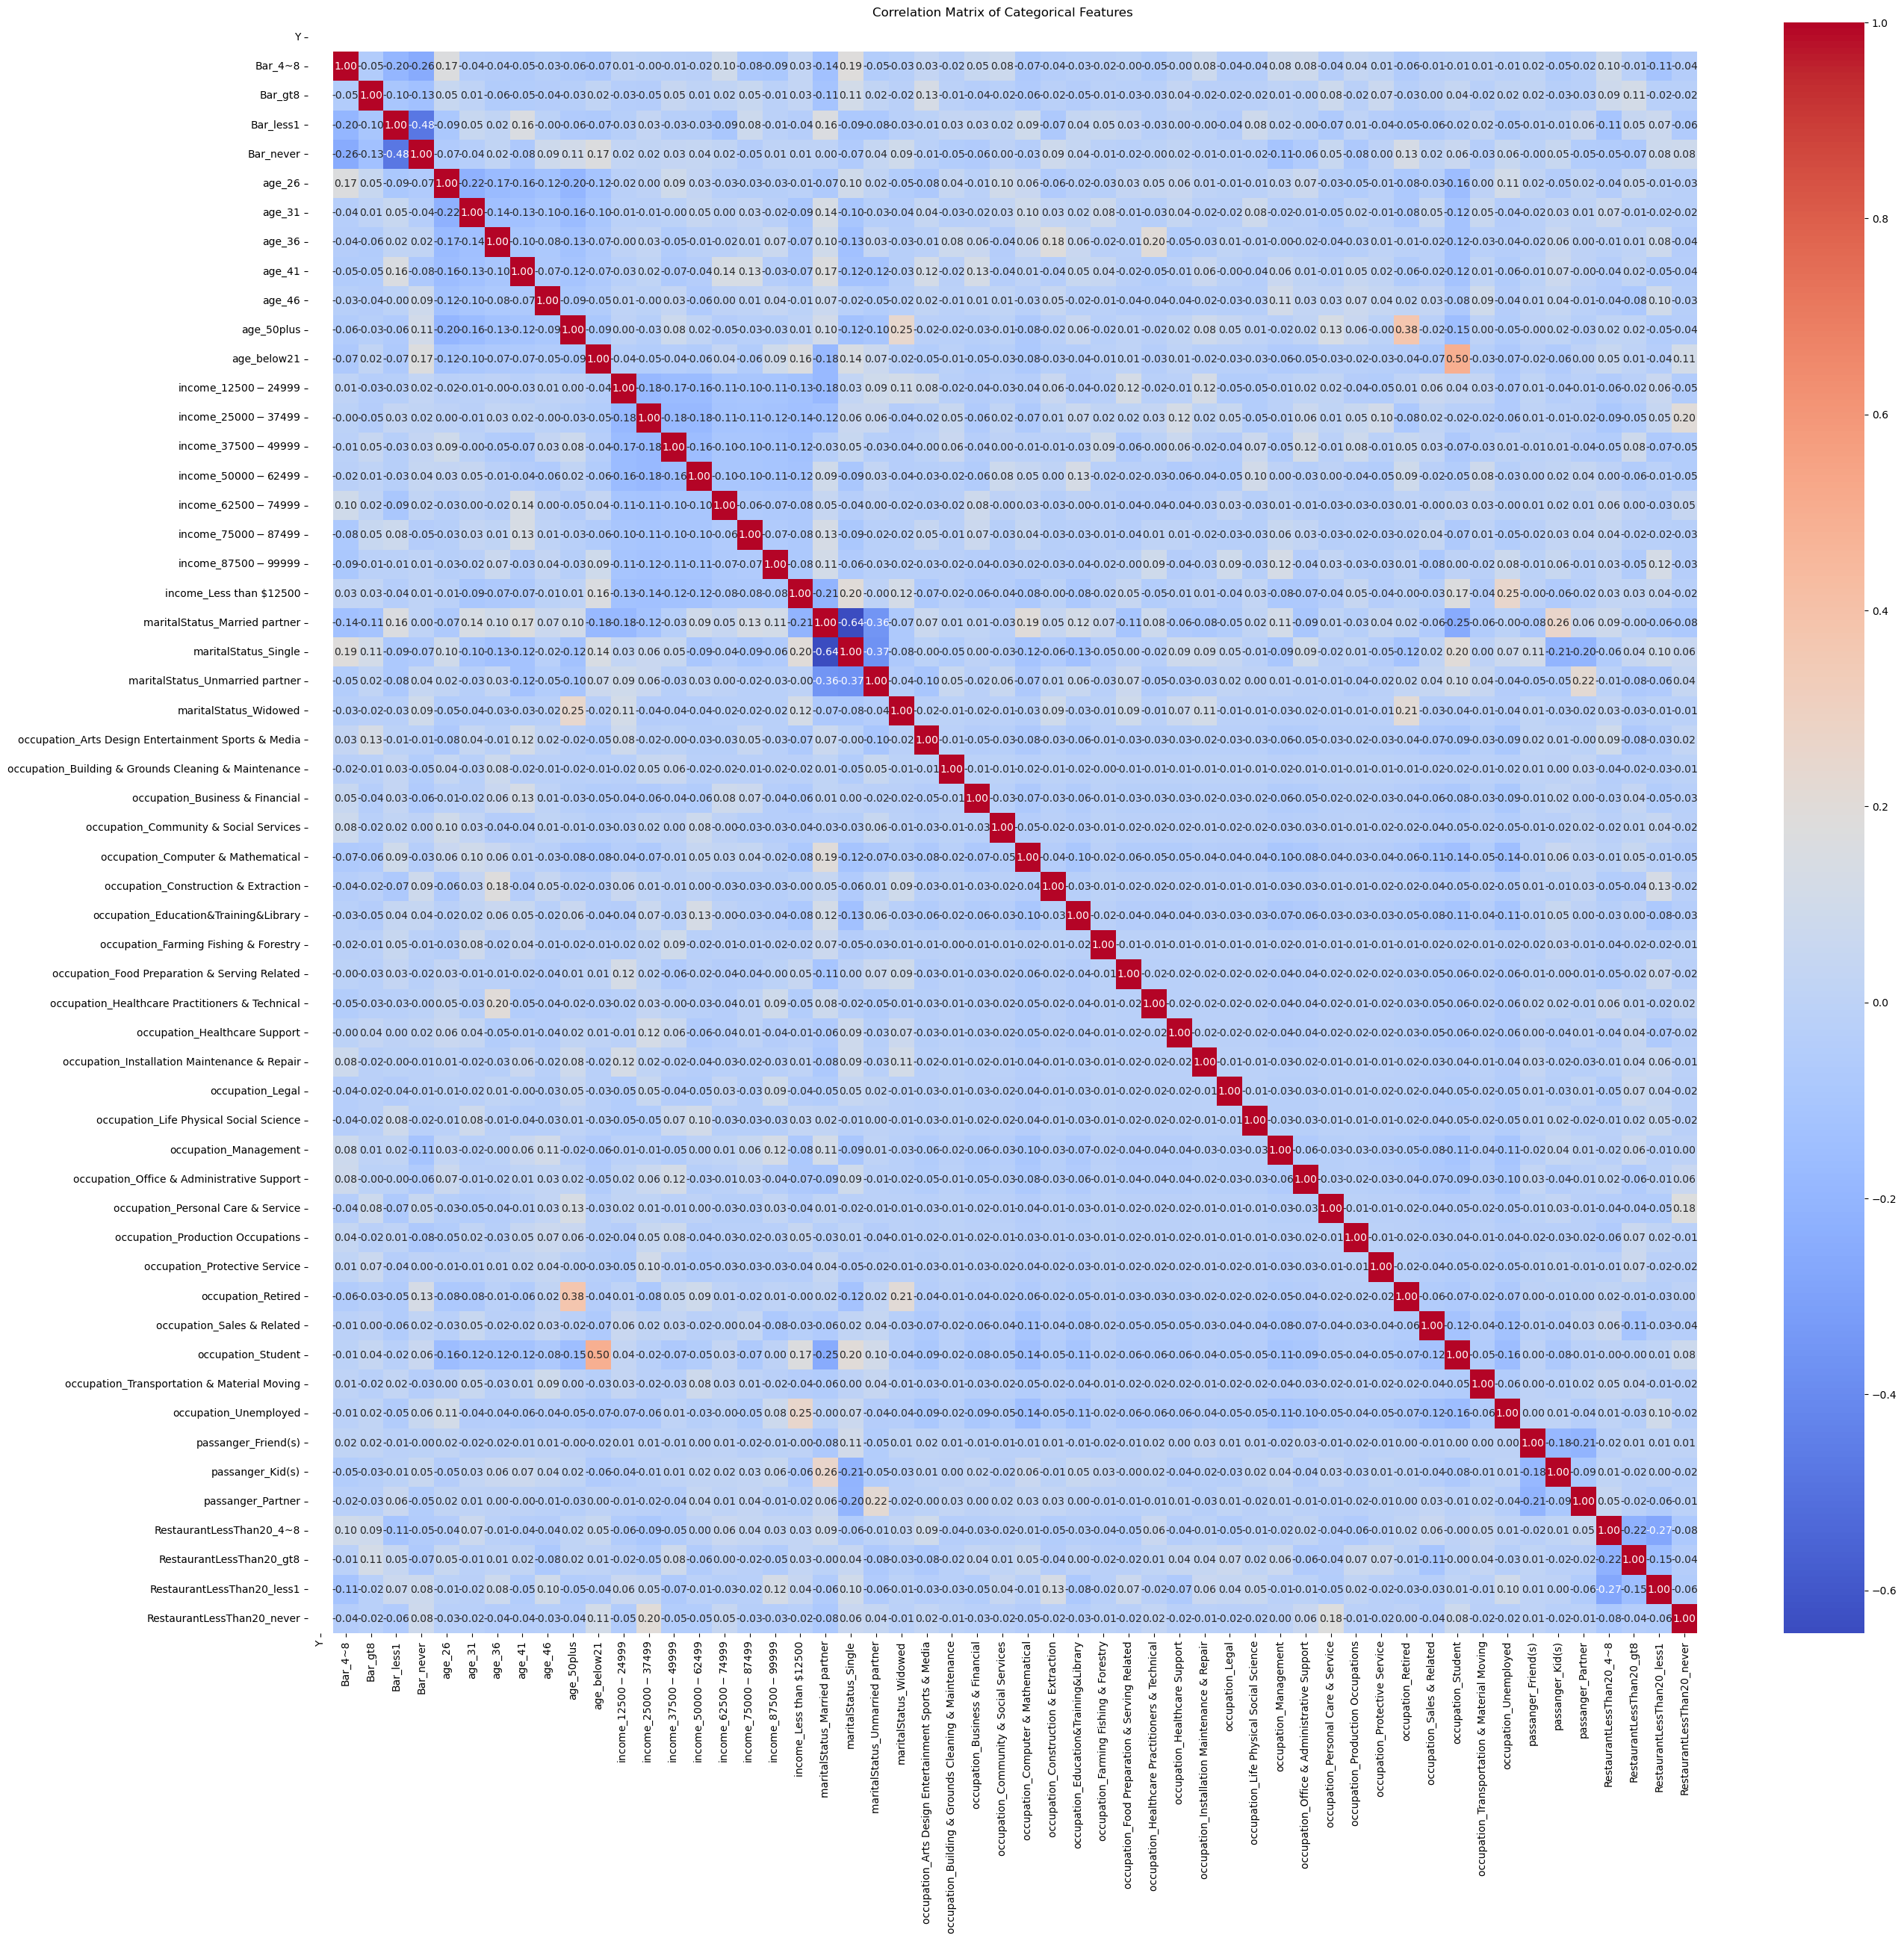

In [79]:
bar_and_cats = bar_coupons.join(data[['Y', 'age', 'income', 'maritalStatus', 'occupation', 'passanger', 'RestaurantLessThan20']], how="outer").query('Y == 1')

# One-hot encode the categorical features
df_encoded = pd.get_dummies(bar_and_cats, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Categorical Features')
plt.show()

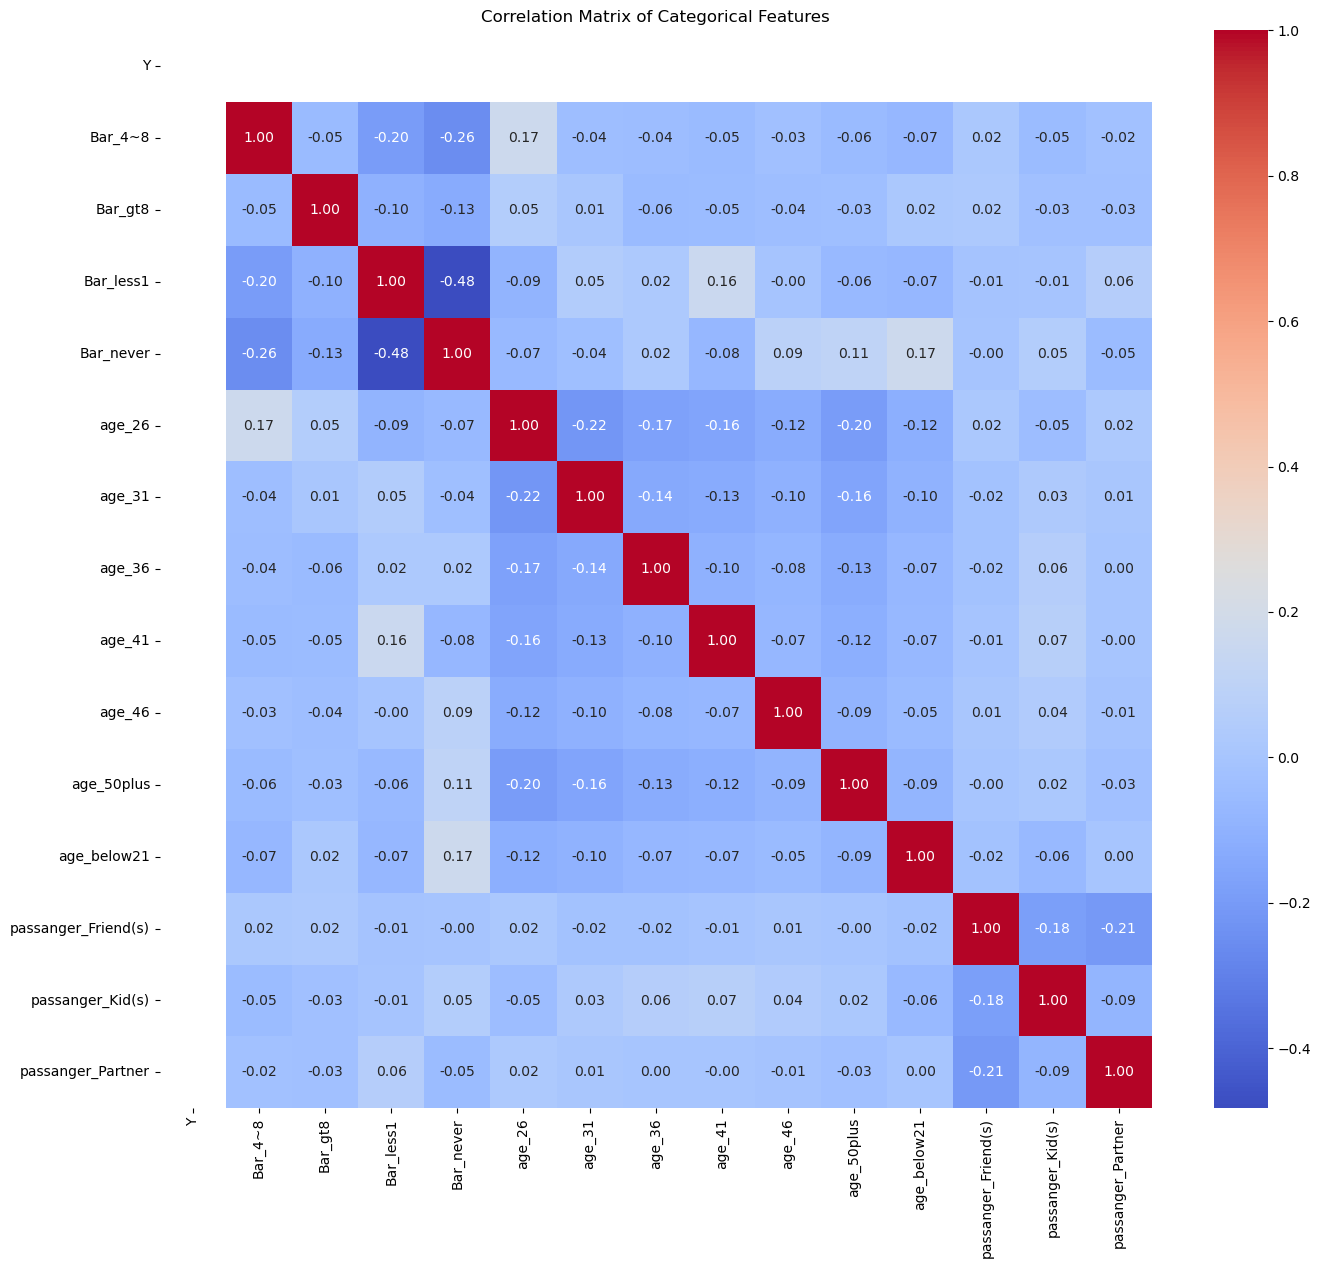

In [83]:
bar_and_less_cats = bar_coupons.join(data[['Y', 'age', 'passanger']], how="outer").query('Y == 1')

# One-hot encode the categorical features
df_encoded = pd.get_dummies(bar_and_less_cats, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Categorical Features')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  